## Assignment - Feature Engineering

### Objective

Modeling of strength of high performance concrete using Machine Learning

### Context

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

##### Dataset: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [241]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import time

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Exploratory Data Analysis

In [2]:
# Loading the dataset via pandas

df = pd.read_csv("concrete.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Attribute Information

● Cement : measured in kg in a m3 mixture <br />
● Blast : measured in kg in a m3 mixture <br />
● Fly ash : measured in kg in a m3 mixture <br />
● Water : measured in kg in a m3 mixture <br />
● Superplasticizer : measured in kg in a m3 mixture <br />
● Coarse Aggregate : measured in kg in a m3 mixture <br />
● Fine Aggregate : measured in kg in a m3 mixture <br />
● Age : day (1~365) <br />
● Concrete compressive strength measured in MPa

In [7]:
df.shape

(1030, 9)

In [3]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [21]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

##### Observation
This gives us an inference that dataset does not have any missing values and null values

#### Univariate Analysis

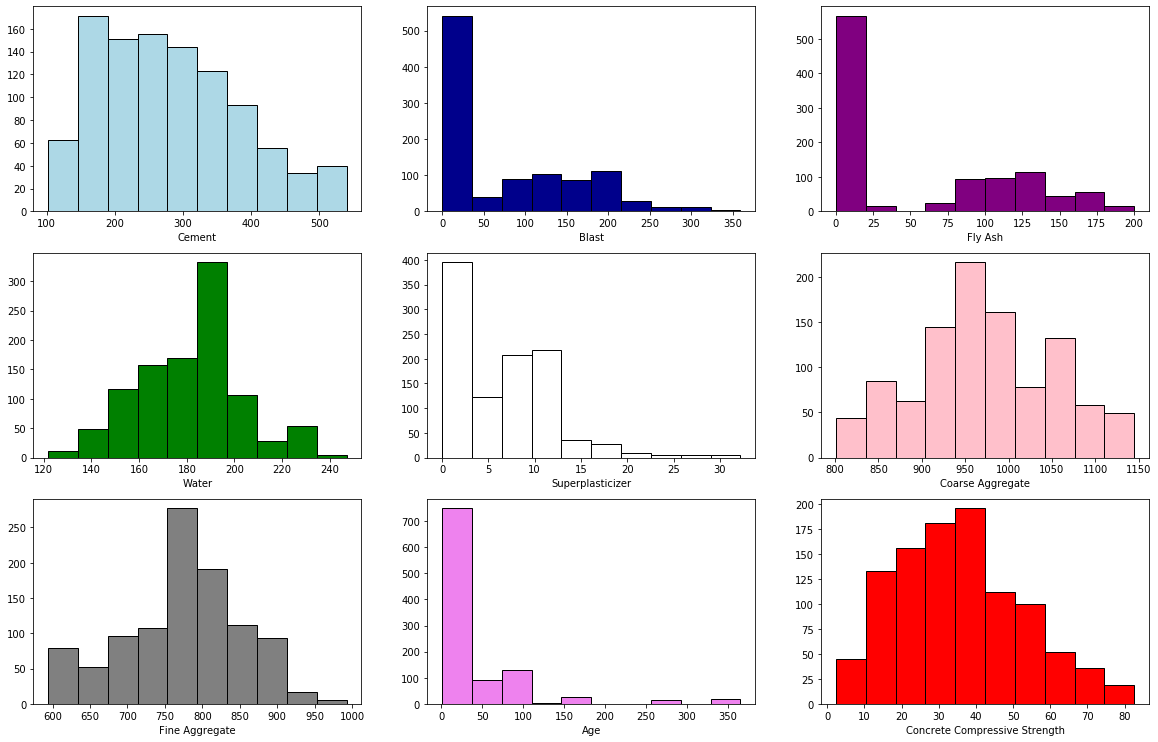

In [59]:
plt.figure(figsize= (20,40))

plt.subplot(9,3,1)
plt.hist(df.cement, color='lightblue', edgecolor = 'black')
plt.xlabel('Cement')

plt.subplot(9,3,2)
plt.hist(df.slag, color='darkblue', edgecolor = 'black')
plt.xlabel('Blast')

plt.subplot(9,3,3)
plt.hist(df.ash, color='purple', edgecolor = 'black')
plt.xlabel('Fly Ash')

plt.subplot(9,3,4)
plt.hist(df.water, color='green', edgecolor = 'black')
plt.xlabel('Water')

plt.subplot(9,3,5)
plt.hist(df.superplastic, color='white', edgecolor = 'black')
plt.xlabel('Superplasticizer')

plt.subplot(9,3,6)
plt.hist(df.coarseagg, color='pink', edgecolor = 'black')
plt.xlabel('Coarse Aggregate')

plt.subplot(9,3,7)
plt.hist(df.fineagg, color='grey', edgecolor = 'black')
plt.xlabel('Fine Aggregate')

plt.subplot(9,3,8)
plt.hist(df.age, color='violet', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(9,3,9)
plt.hist(df.strength, color='red', edgecolor = 'black')
plt.xlabel('Concrete Compressive Strength')

plt.show()

#### Checking for Skewness of data

In [20]:
import statsmodels.api as sm
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.cement),stats.skew(df.slag),stats.skew(df.ash)
                                       ,stats.skew(df.water),stats.skew(df.superplastic)
                                       ,stats.skew(df.coarseagg),stats.skew(df.fineagg),stats.skew(df.age)]}
                        ,index=['Cement','Blast','Fly Ash','Water', 'Superplasticizer'
                                , 'Coarse Aggregate', 'Fine Aggregate','Age'])
Skewness

,Skewness
Cement,0.508739
Blast,0.799550
Fly Ash,0.536571
Water,0.074520
Superplasticizer,0.905881
Coarse Aggregate,-0.040161
Fine Aggregate,-0.252641
Age,3.264415


#### Bi Variate Analysis (Independent vs Dependent)

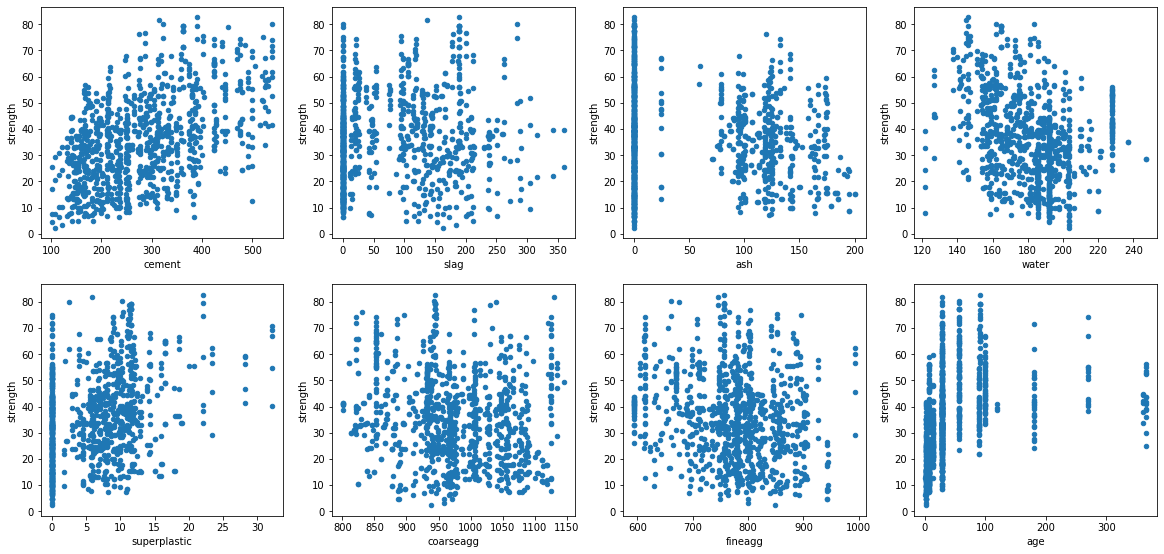

In [51]:
fig = plt.figure(figsize= (20,40))

ax1 = fig.add_subplot(8, 4, 1)
df.plot.scatter(x = "cement", y = "strength", ax=ax1)

ax2 = fig.add_subplot(8, 4, 2)
df.plot.scatter(x = "slag", y = "strength", ax=ax2)

ax3 = fig.add_subplot(8, 4, 3)
df.plot.scatter(x = "ash", y = "strength", ax=ax3)

ax4 = fig.add_subplot(8, 4, 4)
df.plot.scatter(x = "water", y = "strength", ax=ax4)

ax5 = fig.add_subplot(8, 4, 5)
df.plot.scatter(x = "superplastic", y = "strength", ax=ax5)

ax6 = fig.add_subplot(8, 4, 6)
df.plot.scatter(x = "coarseagg", y = "strength", ax=ax6)

ax7 = fig.add_subplot(8, 4, 7)
df.plot.scatter(x = "fineagg", y = "strength", ax=ax7)

ax8 = fig.add_subplot(8, 4, 8)
df.plot.scatter(x = "age", y = "strength", ax=ax8)

##### Observation

1. There are some features such as ‘Age’ are less evenly distributed than other features.
2. 'Slag' is also scattered all over with varient values.

#### Multivariate Analysis

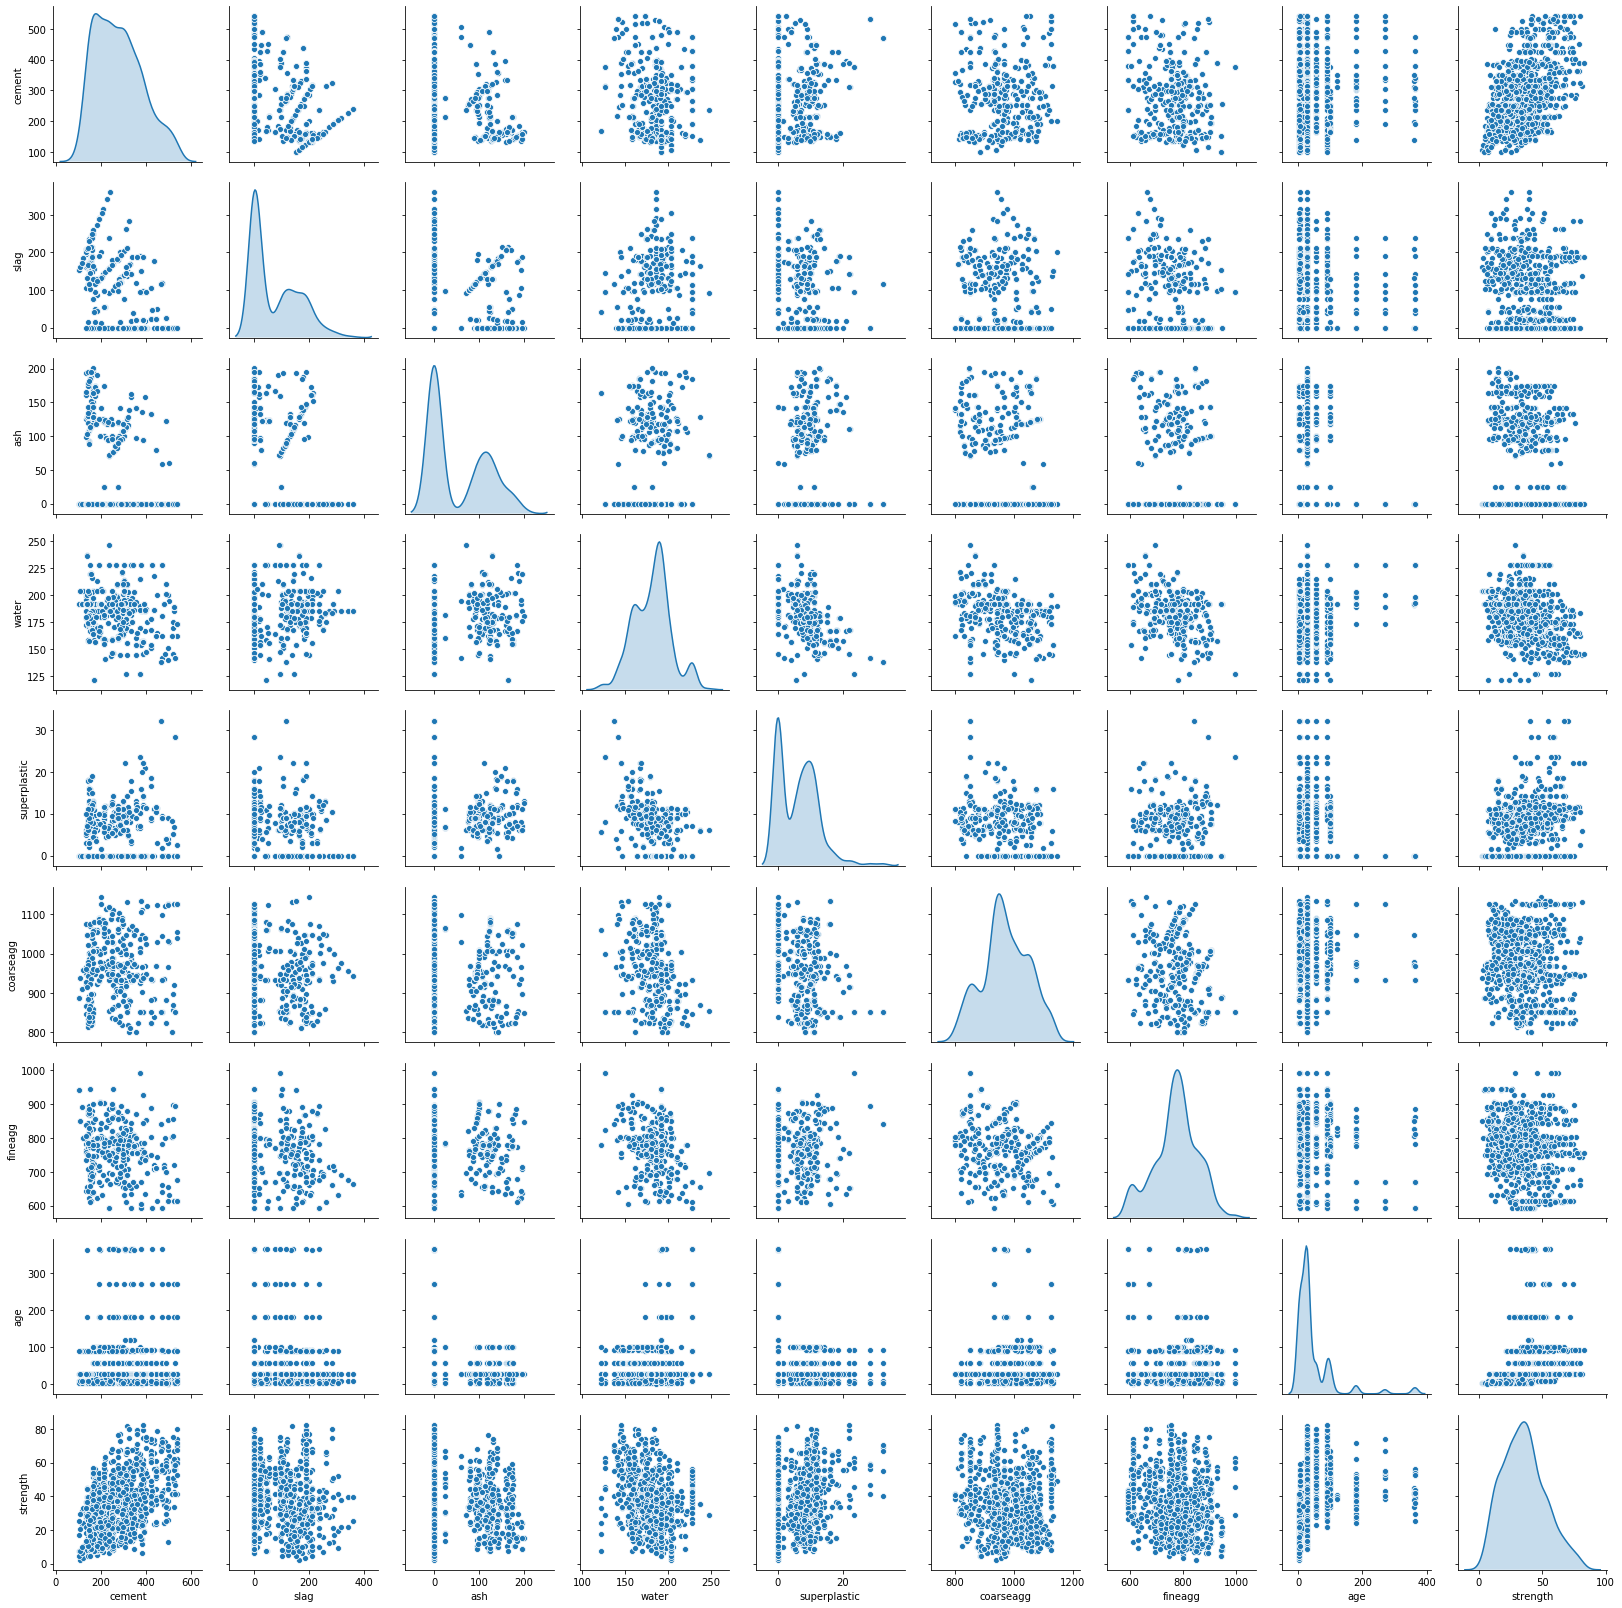

In [28]:
sns.pairplot(df,diag_kind='kde')

###### Observations
Age column does not constitute any meanigful estimation regarding the concrete strength

#### Visualizing Correlation

Text(0.5, 1, 'Correlation between different fearures')

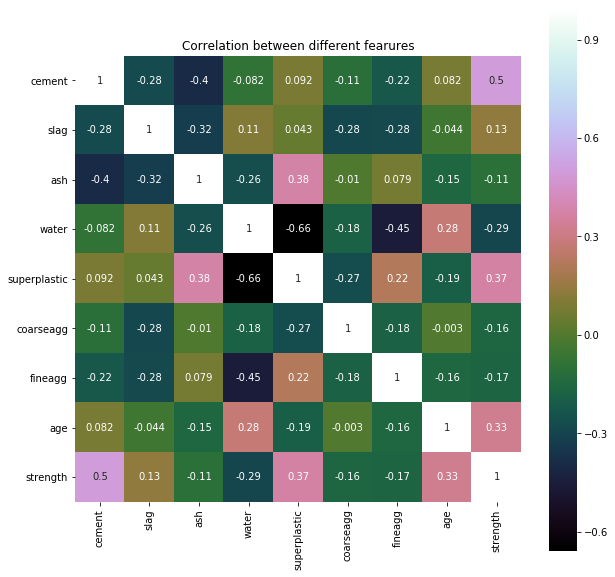

In [54]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

##### Observation

1. Cement, age and superplastic are strongly (positive values) related to strength.
2. Water, ash, coarseagg, fineagg, slag are weakly (negative and near 0.2 values ) related to strength.
3. Correlation between cement and the target variable is 0.5, by this we can say that cement is a strong predictor variable

#### Checking for Outliers

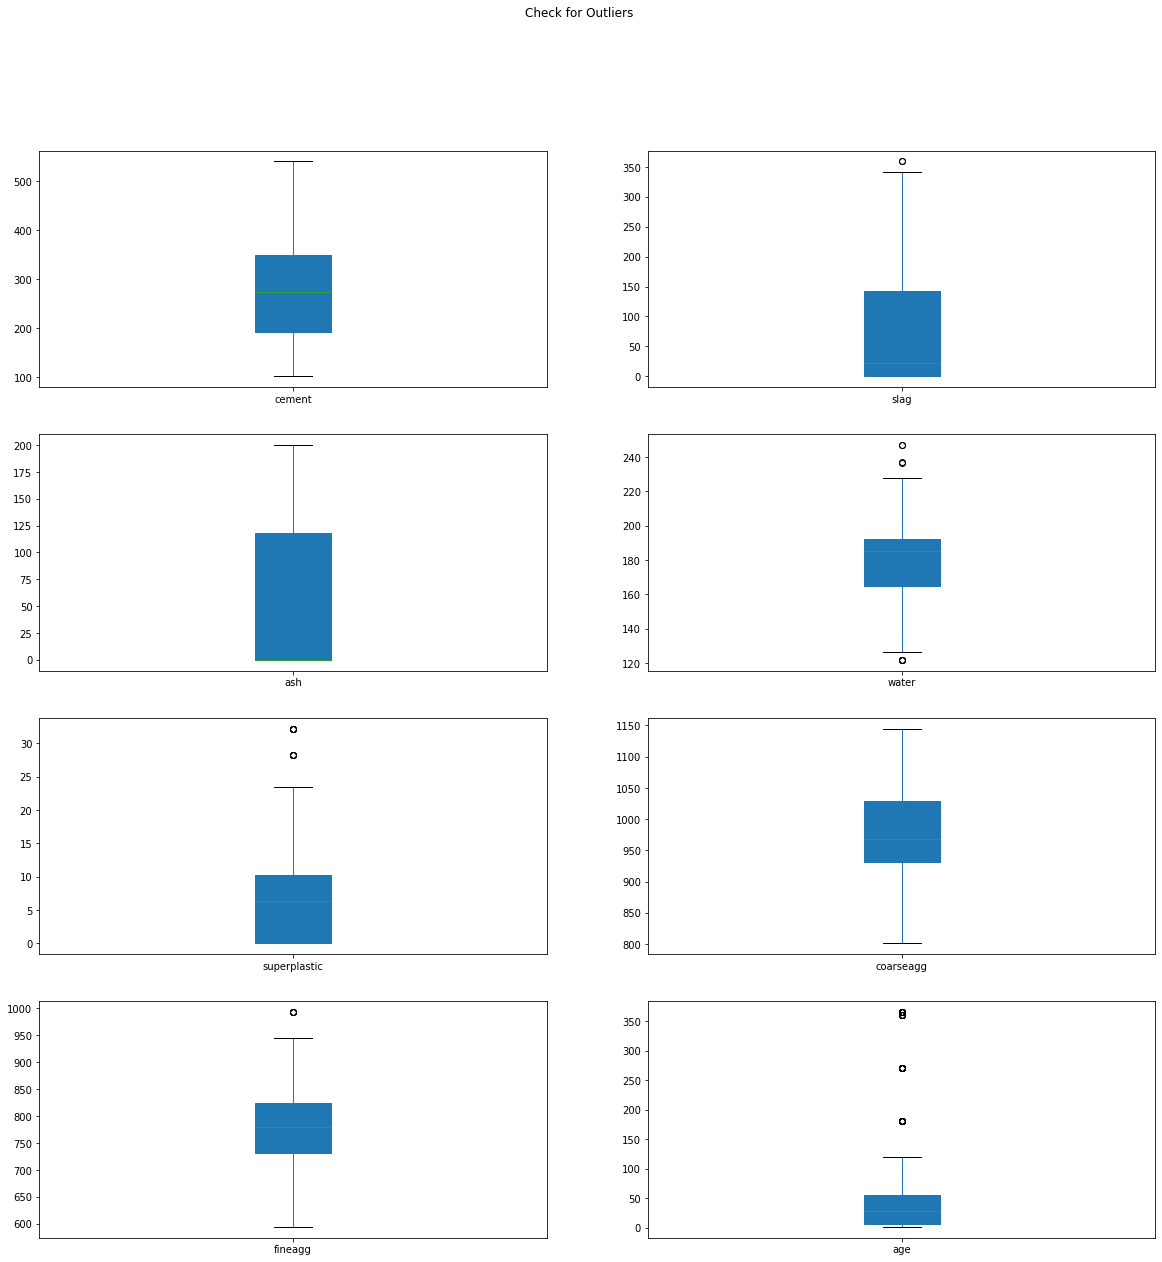

In [27]:
df[['cement','slag','ash','water','superplastic', 'coarseagg', 'fineagg','age']].plot(kind = 'box', figsize = (20,20)
                                                                        ,subplots = True, layout = (4,2)
                                                                        ,sharex = False
                                                                        ,sharey = False,patch_artist=True
                                                                        ,title='Check for Outliers')
plt.show()

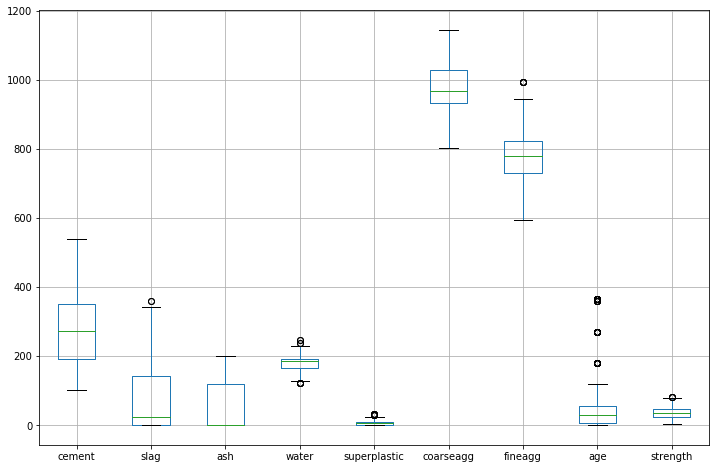

In [29]:
df.boxplot(return_type='axes', figsize=(12,8))

##### Observation
1. Age, Water has some outliers. Hence again, these are less evenly distributed.
2. 'Coarse Aggregate' and 'Fine Aggregate' are negatively skewed and 'Age' is positively skewed than others

#### Handling Outliers

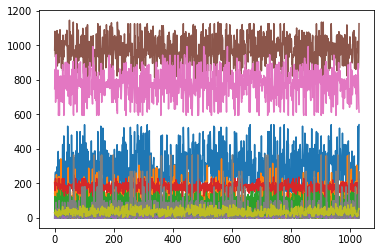

In [52]:
# Let's perform scaling operation to standardize the data

#Before Scaling

plt.plot(df)

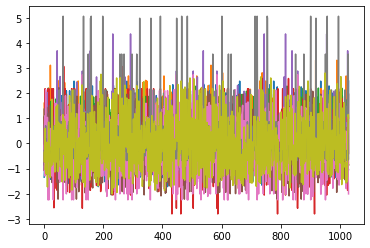

In [53]:
# Scaling

from sklearn.preprocessing import StandardScaler

s_df=StandardScaler().fit_transform(df)

#After Scaling

plt.plot(s_df)


(array([ 45., 133., 156., 181., 196., 112., 100.,  52.,  36.,  19.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <a list of 10 Patch objects>)

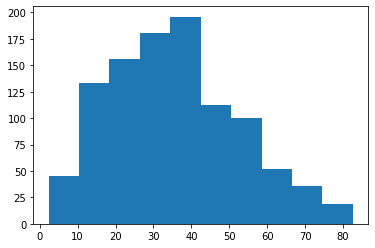

In [57]:
plt.hist(df.strength)

###### Observation
Majority of the data falls between 35 and 45 of the output variable with a right skew on distribution

### Feature Engineering Techniques

#### Composite Feature

Inference form the domain experts state that the concrete strength is based of two important factors.

1. Water - Cement ratio (w-c_ratio) <br/> w-c_ratio = Water / Cement

2. Water - Binder ratio (w-b_ratio) <br/> w-b_ratio = Water / Binder ; (Binder = Cement + Fly Ash + Blast)

On considering the above two proportions we can induce composite features, such that dropping 2 features in 1st ratio and dropping 4 features in 2nd ratio implementation.

Taking account of our observations and visualizations we can go ahead with 2nd ratio (w-b_ratio) since, we find the correlation of slag and ash are not upto the mark, so we can drop them to get a stable feature more than them.

In [62]:
# Dropping 4 features (water, cement, ash, slag) to 1 new feature (w-b_ratio)

df_wb = df.copy()

df_wb.insert(df_wb.shape[-1]-1
                       ,'w-b_ratio'
                       ,df_wb['water']/(df_wb['cement'] + df_wb['ash'] + df_wb['slag']))

df_wb.drop(['water', 'cement', 'ash', 'slag'], axis=1, inplace=True)


#### New Dataset (water-binder ratio added, ‘Water’,’Cement’,’Slag’ and ‘Fly ash’ dropped)

In [64]:
df_wb.head(5)

,superplastic,coarseagg,fineagg,age,w-b_ratio,strength
0,0.0,971.8,748.5,28,0.575998,29.89
1,10.8,1080.8,796.2,14,0.471974,23.51
2,5.5,956.9,861.2,28,0.542089,29.22
3,0.0,932.0,670.0,28,0.600000,45.85
4,9.1,1047.4,696.7,28,0.571555,18.29


In [65]:
df_wb.shape

(1030, 6)

##### Observation
Features count have been reduced to 6 (including dependant variable)

#### Feature Importance

In [107]:
# Original Dataset

x = df.drop(['strength'], axis=1)
y = df[['strength']]

##### 1. Feature importance using Lasso model

Best alpha using built-in LassoCV: 0.868299
Best score using built-in LassoCV: 0.615354


Text(0.5, 1.0, 'Feature importance using Lasso Model')

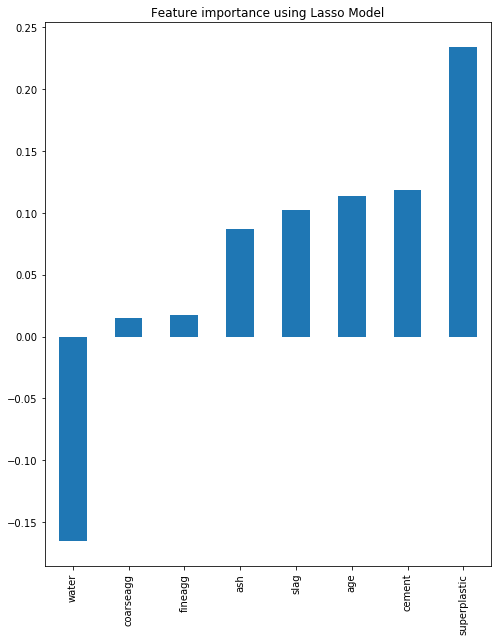

In [76]:
from sklearn.linear_model import LassoCV 

reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "bar")
plt.title("Feature importance using Lasso Model")

##### Observations
Features such as fineagg, coarseagg and ash have quite lower value (above 0 and below 0.1) than other features, thus conclude them as weak predictors of the target output variable.

##### 2. Feature importance using Pearson Correlation Filter method

In [100]:
df.corr(method='pearson')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [98]:
# Correlation with output variable

cor_target = abs(corr['strength'])
str_features = cor_target[cor_target > 0.30] # Rule of thumb - 30%

str_features

cement          0.497832
superplastic    0.366079
age             0.328873
strength        1.000000
Name: strength, dtype: float64

##### Observations

1. Same inference from lasso model is visible from Pearson method too, where we can see weak correlation between predictor variables (ash, coarseagg, fineagg and slag) and the output variable (strength)

2. Strong predictor variables are cement, superplastic & age

#### Strong Predictor Variables Heatmap

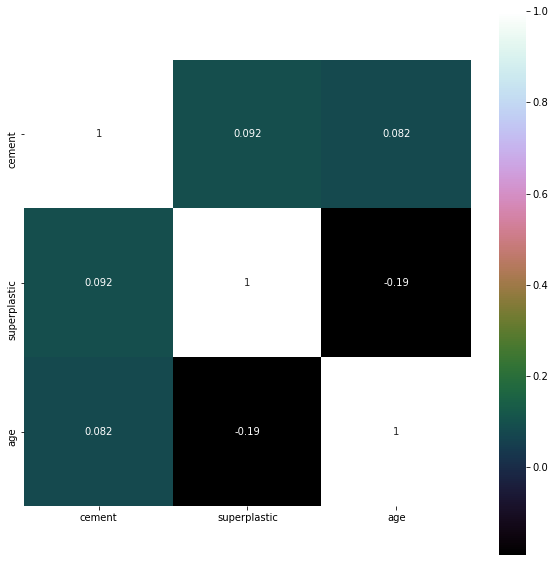

In [106]:
str_corr = df[["cement","superplastic","age"]].corr() # Correlation between strong predictors

plt.figure(figsize=(10,10))
sns.heatmap(str_corr, vmax=1, square=True,annot=True,cmap='cubehelix')

##### Observations
Not much relation between each feature that are strongly helpful in determining the target variable

#### Model creation (original dataset)

In [200]:
# Independant Variable
X = df.drop(['strength'], axis=1)

# Dependant Variable
Y = df[['strength']]

In [201]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [212]:
# Scaling the data using Standard Scalar

X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [203]:
# Model performance metrics in a DataFrame

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

# Function to append the cross validation scores of the algorithms

def input_scores(name, model, X, Y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, X, Y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, X, Y, cv=cv, scoring='r2').mean())

In [204]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']

models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

# Running algorithms

for name, model in zip(names, models):
    input_scores(name, model, X_train_sd, y_train.values.ravel())

In [205]:
pd.DataFrame({'Model': Model,'RMSE': RMSE,'R Squared': R_sq})

,Model,RMSE,R Squared
0,Linear Regression,10.753860,0.590697
1,Ridge Regression,10.753171,0.590764
2,Lasso Regression,11.229634,0.555733
3,K Neighbors Regressor,9.759976,0.664443
4,Decision Tree Regressor,8.068634,0.760130
5,Random Forest Regressor,5.935406,0.879622
6,Gradient Boosting Regressor,5.722691,0.885415
7,Adaboost Regressor,8.024144,0.771049


##### Observations

From the above table, Gradient Boosting Regressor is way ahead than any other models holding low RMSE value and Higher R2 value, followed by next model Random Forest Regressor.

In [206]:
# Tuning the model Gradient Boosting Regressor using GridSearchCV and K-fold validation

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,1001,10),
             'max_depth':[10], #range(5,16,2), 
             'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}

clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train_sd, y_train.values.ravel())

print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=100,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
R Squared: 0.9121348771243816


In [207]:
# Tuning the tree specific parameters

param_grid = {'n_estimators': [230],
             'max_depth': range(10,31,2), 
              'min_samples_split': range(50,501,10), 
              'learning_rate':[0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                  param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train_sd,y_train.values.ravel())
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=16,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=100,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
R Squared: 0.916217324365419


#### Testing Data

In [255]:
clfg = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=200, n_estimators=230, 
                                learning_rate=0.3)

print("R Squared:",cross_val_score(clfg, X_train_sd, y_train.values.ravel(), cv=cv, scoring='r2').mean())

R Squared: 0.9142966230884874


Since score improved, the best model is GradientBoostingRegressor with learning_rate= 0.3, max_depth= 20, min_samples_split= 200, n_estimators= 230

In [253]:
# Applying this model on test data and see scores

clfg.fit(X_train_sd,y_train)
predict_clf = clfg.predict(X_test_sd)

print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clfg.predict(X_test_sd))))
print("Test R^2: ", r2_score(y_test, clfg.predict(X_test_sd)))

Test RMSE:  7.522363038626436
Test R^2:  0.7811673106083521


#### Model building with Gradient Boosting on applying PCA

In [214]:
# Generating the covariance matrix and the eigen values for the PCA analysis

cov_matrix = np.cov(X_train_sd.T)

print('\nCovariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00138889 -0.26269399 -0.39968629 -0.09476235  0.09703896 -0.14383704
  -0.20902425  0.07650927]
 [-0.26269399  1.00138889 -0.32347201  0.10032775  0.07261197 -0.28113265
  -0.29144346 -0.03459068]
 [-0.39968629 -0.32347201  1.00138889 -0.26380968  0.35843293 -0.01053081
   0.08425217 -0.15622611]
 [-0.09476235  0.10032775 -0.26380968  1.00138889 -0.66023736 -0.18496916
  -0.41420499  0.26916111]
 [ 0.09703896  0.07261197  0.35843293 -0.66023736  1.00138889 -0.27591399
   0.22198863 -0.19554829]
 [-0.14383704 -0.28113265 -0.01053081 -0.18496916 -0.27591399  1.00138889
  -0.17774559 -0.00816411]
 [-0.20902425 -0.29144346  0.08425217 -0.41420499  0.22198863 -0.17774559
   1.00138889 -0.14692699]
 [ 0.07650927 -0.03459068 -0.15622611  0.26916111 -0.19554829 -0.00816411
  -0.14692699  1.00138889]]


In [215]:
# Generating the eigen values and the eigen vectors

e_vals, e_vecs = np.linalg.eig(cov_matrix)

print('\nEigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)


Eigenvectors 
[[ 0.08888722 -0.45449227 -0.20209925 -0.21457303  0.79324384  0.21329301
  -0.07743241  0.13388305]
 [ 0.17313301 -0.44050968 -0.23434032 -0.57613363 -0.43205008 -0.28155452
  -0.34241674 -0.07708049]
 [-0.39816571 -0.39037916 -0.32808824  0.2758907  -0.32661259  0.21858588
   0.1655782   0.56871689]
 [ 0.54779024 -0.37763668  0.53056488  0.02847476 -0.21274661  0.36043983
   0.30901165  0.06588096]
 [-0.51042954 -0.0442966   0.6758495  -0.36714068  0.08658663 -0.16647584
  -0.09035338  0.32024909]
 [ 0.0398118  -0.36012341  0.23267553  0.63565663  0.06141883 -0.30383904
  -0.55503954 -0.07980964]
 [-0.39380451 -0.41541188  0.02369384  0.04667362  0.02373516 -0.16380287
   0.48833001 -0.63541342]
 [ 0.29378335 -0.01282849 -0.06023012  0.06381153  0.14257333 -0.74207328
   0.44626432  0.36834148]]

Eigenvalues 
[2.25336153 0.03132964 0.18510572 1.43738446 1.34140392 0.80191085
 1.03203755 0.92857743]


In [216]:
print('\nEigenvalues \n%s' %sorted(e_vals, reverse=True))


Eigenvalues 
[2.25336153166087, 1.4373844596101946, 1.3414039229864705, 1.0320375545671938, 0.9285774269110904, 0.8019108528885465, 0.1851057210667926, 0.031329641419959295]


In [217]:
# "Cumulative variance explained" analysis

tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print("\nCumulative Variance Explained", cum_var_exp)


Cumulative Variance Explained [ 28.12795255  46.07033831  62.81463138  75.69720835  87.28832741
  97.29831032  99.60892265 100.        ]


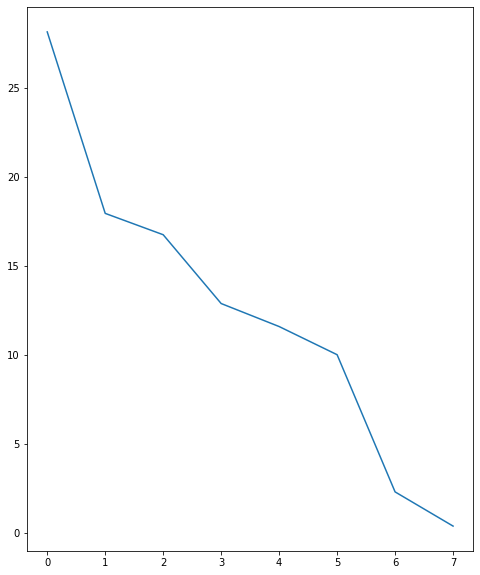

In [218]:
plt.plot(var_exp)

##### Observation
Elbow goes down steeply when the number of components increase

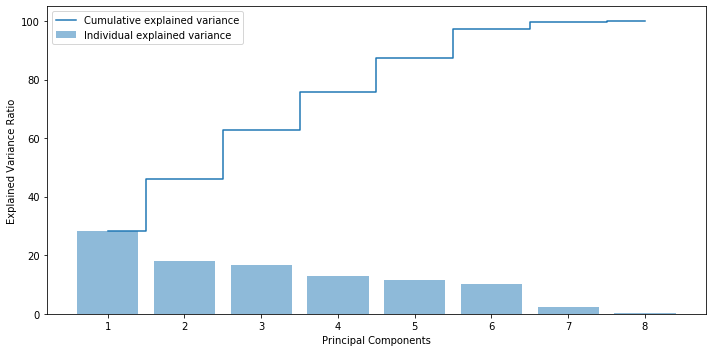

In [219]:
# Plotting the variance explained by the principal components and the cumulative variance explained.

plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [226]:
dim=np.arange(1,9)
pd.DataFrame({'Dim':dim,'Var_Exp': var_exp,'Cum_Var': cum_var_exp})

,Dim,Var_Exp,Cum_Var
0,1,28.127953,28.127953
1,2,17.942386,46.070338
2,3,16.744293,62.814631
3,4,12.882577,75.697208
4,5,11.591119,87.288327
5,6,10.009983,97.298310
6,7,2.310612,99.608923
7,8,0.391077,100.000000


In [258]:
# Generating 5 PCA dimensions

from sklearn.decomposition import PCA

pca = PCA(n_components=5)

X_train_sd_pca = pca.fit_transform(X_train_sd)
X_test_sd_pca = pca.fit_transform(X_test_sd)

print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.13061151  0.16353792 -0.38736674  0.54399558 -0.50107813  0.05162828
  -0.41551234  0.28951083]
 [ 0.47428216 -0.67701248 -0.00385205 -0.14462501 -0.07460081  0.51133787
  -0.0338769   0.16613235]
 [ 0.66384547  0.15861141 -0.47072175 -0.19084511  0.32223486 -0.41465912
   0.01929724 -0.00095565]
 [ 0.09708208 -0.21642288  0.52967526  0.27092311  0.31679183 -0.42225422
  -0.30110907  0.46953023]
 [-0.14295648 -0.28866971 -0.19718672  0.10795453 -0.26428332 -0.33815434
   0.71430174  0.38894144]]
[0.28983949 0.18160909 0.15926777 0.12863011 0.12191345]


In [259]:
# Tuning the model Gradient Boosting Regressor using GridSearchCV and K-fold validation

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':range(20,1001,10),
             'max_depth':[10], #range(5,16,2), 
             'min_samples_split':[100], #range(200,1001,200), 
              'learning_rate':[0.2]}

clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train_sd_pca, y_train.values.ravel())

print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=100,
                          min_weight_fraction_leaf=0.0, n_estimators=80,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
R Squared: 0.6323523057329948


In [260]:
# Tuning the tree specific parameters

param_grid = {'n_estimators': [230],
             'max_depth': range(10,31,2), 
              'min_samples_split': range(50,501,10), 
              'learning_rate':[0.2]}

clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                  param_grid = param_grid, scoring='r2', 
                   cv=cv).fit(X_train_sd_pca,y_train.values.ravel())

print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=30,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
R Squared: 0.6551759819250724


In [261]:
clfg = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=200, n_estimators=230, 
                                learning_rate=0.3)

print("R Squared:",cross_val_score(clfg, X_train_sd_pca, y_train.values.ravel(), cv=cv, scoring='r2').mean())

R Squared: 0.5714294348695546


In [272]:
# Applying this model on test data and see scores

clfg.fit(X_train_sd_pca,y_train)
predict_clf = clfg.predict(X_test_sd_pca)

print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, clfg.predict(X_test_sd_pca))))
print("Test R^2: ", abs(r2_score(y_test, clfg.predict(abs(X_test_sd_pca)))))

Test RMSE:  19.280733813697175
Test R^2:  0.8534165775306262


#### Model building with Gradient Boosting with Bootstrap Samples

In [232]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df)
concr_scaled = pd.DataFrame(scaler.transform(df),
                              columns = df.columns)
concr_scaled .head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727


In [233]:
values = concr_scaled.values

In [234]:
# Configure bootstrap

n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(concr_scaled) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# Run bootstrap

stats = list()
for i in range(n_iterations):
    
    # Prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    # Fit model
    model = GradientBoostingRegressor(random_state=1, max_depth=20, 
                                min_samples_split=50, n_estimators=230, 
                                learning_rate=0.2)
    
    model.fit(train[:,:-1], train[:,-1])
    
    # Evaluate model
    predictions = model.predict(test[:,:-1])
    score = r2_score(test[:,-1], predictions)    # Caution, overall accuracy score can mislead when classes are imbalanced
    print(score)
    stats.append(score)

0.9028127269909219
0.909235557736156
0.8706787798866142
0.8846613648639674
0.8952872703077184
0.8816867641063829
0.8942389654828423
0.8982311147100289
0.8850225734041113
0.8711302780493472
0.8848307687894845
0.8809039469886071
0.8834277134009767
0.8698430364369951
0.8747482921671861
0.8926884007566074
0.8915305918754071
0.8986549734631561
0.8916319579794346
0.8852647917788222
0.8451360910741683
0.9077559271151968
0.8955899019192022
0.8933407264238142
0.8884766231652574
0.8916257349852449
0.9041709292181901
0.8999985983584743
0.8676635197733313
0.8796949622053856
0.8753840113839421
0.8944995612391916
0.887688022871614
0.899330885106501
0.8672025866807656
0.8716145710646259
0.8897179107099411
0.8913656255837222
0.889136749754364
0.8896524373924133
0.8941130606571638
0.8941574790947936
0.89846379026603
0.8772862266238938
0.8874955379962411
0.8702517859066474
0.8594688515535938
0.8628064136765411
0.9002798610438458
0.8854696066431915
0.8816659949819502
0.8912770483960221
0.8948006003395126

#### Model performance range at 95% confidence interval

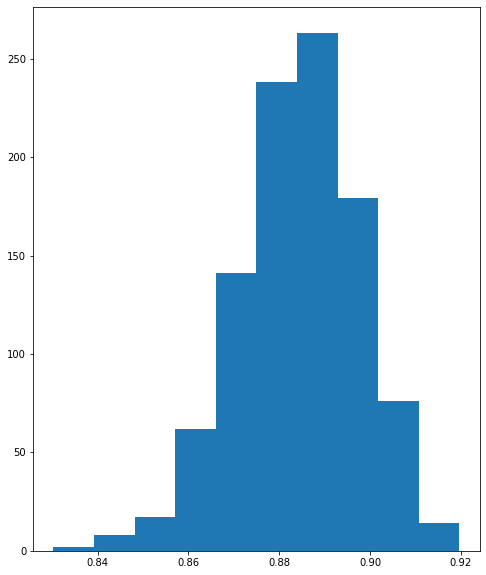

95.0 confidence interval 85.7% and 90.8%


In [235]:
plt.hist(stats)
plt.show()

# Confidence intervals

alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Conclusion

1. Chosen model : Gradient Boosting Regressor, it performed very well in both train and test data.
2. Without PCA : Reliability is quiet low as some measures are not necessary, holds value 78%
3. With PCA : Reliability has been proved on reducing the features and Gradient boosting Regressor works fine with value 85%
4. Confidence Interval : Realtime implementaion is clear with this even without PCA.

##### Suggestion

GradientBoostingRegressor is the best tool for this dataset, by dropping two low important feature 'slag' and 'ash' we can perform well and deployment of the same is feasible.